In [1]:
from bs4 import BeautifulSoup
import requests
import pickle
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import scipy as sp
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#List of pages to scrape from

LLS = []

for i in range(1917,2016):
    link = "%s%s" %('http://www.chidlovski.net/liftup/l_recResult_by_Year.asp?wyear=',i)
    LLS.append(link)
    
    

In [3]:
len(LLS)

99

In [4]:
#Getting all the information from previous world records.

recordslist = []
for i in range(len(LLS)):
    recordentries = []
    r= requests.get(LLS[i])
    soup = BeautifulSoup(r.content)
    rows = soup.find_all("tr")
    for row in rows:
        cells = row.find_all('td')
        texcell = []
        for td in cells:    
            texcell.append(td.text)
        recordentries.append(texcell)
    recordslist.append(recordentries) 

In [6]:
#Creating a coherent list of all world records.
allrecords = []
for record in recordslist:
    y = 1917+recordslist.index(record)
    for lifter in record[1:]:
        if lifter[0] !='' and lifter[2] !='' and lifter[3] !='' and lifter[4] !='':
            goodyears = [1920, 1921, 1922, 1923, 1924, 1928, 1932, 1936, 1937, 1938]
            
            
#If the caption does not contain the numeric value of the weight class assign it to it.            
            if y <1946 and (y not in goodyears):
                
                bwc = lifter[0].replace(u"\xa0",u'')
                if bwc == 'Featherweight':
                    bw = 60
                elif bwc == 'Lightweight':
                    bw = 67.5
                elif bwc == 'Middleweight':
                    bw = 75
                elif bwc == 'Light HeavyWeight':
                    bw = 82.5
                elif bwc == 'Heavyweight' or bwc =='Super Heavyweight':
                    bw = 93.5
#turning the number in the caption to a float            
            else:
                bw = lifter[0].replace(u"\xa0",u' ')
                bw = bw.split(' ')
                k =len(bw)-1
                bw = bw[k][1:-3]
                if '+' in bw:
                    bw = float(bw[:-1])+11
                elif '' == bw:
                    bw = 100
                else:
                    bw =float(bw)
             
            
#name and country are on the same text line so we have to split them            
            namecountry = lifter[2].split(' ')
#Some special cases            
            if 'Cuba' == namecountry[len(namecountry)-1]:
                country = 'Cuba'
                name = namecountry[0].replace(u"\xa0",u' ')
                for i in range(1,len(namecountry)-1):
                    name = name + namecountry[i]
                
                
            elif 'Egypt' == namecountry[len(namecountry)-1]:
                country = 'Egypt'
                name = namecountry[0].replace(u"\xa0",u' ')
                for i in range(1,len(namecountry)-1):
                    name = name + namecountry[i]
                    
            elif 'Korea' == namecountry[len(namecountry)-1]:
                country = "%s %s" % (namecountry[len(namecountry)-2],namecountry[len(namecountry)-1])
                name = namecountry[0].replace(u"\xa0",u' ')
                for i in range(1,len(namecountry)-2):
                    name = name + namecountry[i]
                    
            elif 'Belgium' == namecountry[len(namecountry)-1]:
                country = namecountry[len(namecountry)-1]
                name = namecountry[0].replace(u"\xa0",u' ')
                for i in range(1,len(namecountry)-1):
                    name = name + namecountry[i] 
                    
                    
#general case                
            elif len(namecountry) >2:    
                n = len(namecountry)-1
                country = "%s %s" % (namecountry[n-1],namecountry[n])
                name = namecountry[0].replace(u"\xa0",u' ')  
                
            else:
                
                country = namecountry[1]
                name = namecountry[0].replace(u"\xa0",u' ')
                
#fixing old country names and a few glitches

            if country == 'East Germany' or country =='West Germany':
                country = 'Germany'
            
            elif country == 'Soviet Union':
                country = 'Russia'
                
            elif country == 'TRZEBIATOWSKI Germany':
                country = 'Germany'
                name = 'Hans VON TRZEBIATOWSKI'
            
            if name == 'Ming':
                country = 'China'
                name ='Ming Siang HSIAO'
                
                
#fixing names of events            
            event = lifter[3].replace(u"\xa0",u'').split(' ')
            if event[0] == 'Total2' or event[0]=='Total3':
                event = 'Total'
              
            elif event[0]=='Clean':
                event = 'Clean and Jerk'
                
            elif event[0] =='Snatch':
                event = 'Snatch'
                
            elif event[0] =='Press':
                event = 'Press'
        
            result = lifter[4].replace(u"\xa0",u'')
            if result !='':    
                result = float(result)
#creating full clean table            
                allrecords.append((event ,y , country, name, bw, result))

In [7]:
len(allrecords)

1991

In [8]:
#Passing the information onto Pandas to facilitate the analysis.
records = pd.DataFrame(allrecords, columns=['Event', 'Year', 'Country','Lifter', 'Weight Class', 'Record'])

In [10]:
records.head()

,Event,Year,Country,Lifter,Weight Class,Record
0,Snatch,1917,Russia,Alexander BUKHAROV,60.0,75.0
1,Snatch,1918,Germany,Hermann SHWINDT,60.0,92.5
2,Clean and Jerk,1919,Germany,Johann RENNER,67.5,102.5
3,Clean and Jerk,1919,Germany,Josef ZIMMERMANN,67.5,107.5
4,Snatch,1919,Germany,Hans GEORGI,67.5,85.0


In [381]:
def eventnumber(row):
    if row['Event'] == 'Snatch':
        return 1
    elif row['Event'] == 'Clean and Jerk':
        return 2
    elif row['Event'] == 'Total':
        return 3
    else:
        return 4

In [13]:
records['Event Code'] = records.apply(lambda row: eventnumber(row),axis=1)

In [14]:
records.head()

,Event,Year,Country,Lifter,Weight Class,Record,Event Code
0,Snatch,1917,Russia,Alexander BUKHAROV,60.0,75.0,1
1,Snatch,1918,Germany,Hermann SHWINDT,60.0,92.5,1
2,Clean and Jerk,1919,Germany,Johann RENNER,67.5,102.5,2
3,Clean and Jerk,1919,Germany,Josef ZIMMERMANN,67.5,107.5,2
4,Snatch,1919,Germany,Hans GEORGI,67.5,85.0,1


In [15]:
#Didn't know we had world records
records[records['Country']=='Puerto Rico']

,Event,Year,Country,Lifter,Weight Class,Record,Event Code
572,Press,1964,Puerto Rico,Fernando BAEZ,56,117.5,4
661,Press,1966,Puerto Rico,Fernando BAEZ,56,120.0,4
691,Press,1967,Puerto Rico,Fernando BAEZ,56,122.5,4


In [105]:
#Amount of world Records broken by the different countries.
records.groupby('Country')['Record'].count()

Country
Argentina                 1
Armenia                   4
Austria                  30
Belarus                  18
Belgium                   7
Bulgaria                240
Burma                     2
Canada                    8
China                    60
Croatia                   1
Cuba                     22
Czechoslovakia            3
Denmark                   2
Egypt                    37
Estonia                   6
Finland                  31
France                   37
Georgia                   4
Germany                  87
Great Britain             3
Greece                   22
Hungary                  42
Indonesia                 2
Iran                     28
Italy                     6
Japan                    49
Kazakhstan                8
Luxembourg                1
Netherlands Antilles      1
North Korea              13
Norway                    1
Poland                   47
Puerto Rico               3
Romania                   2
Russia                  974
Singapore   

In [436]:
#Records sorted by body weight and record to see the progression a bit better.
records.sort(['Weight Class', 'Event', 'Record'], ascending=True).head()

,Event,Year,Country,Lifter,Weight Class,Record,Event Code
781,Clean and Jerk,1969,Russia,Vladislav KRISHCHISHIN,52,125.5,2
782,Clean and Jerk,1969,Russia,Vladislav KRISHCHISHIN,52,127.0,2
783,Clean and Jerk,1969,Indonesia,Charlie DEPHTIOS,52,127.5,2
784,Clean and Jerk,1969,Russia,Vladislav KRISHCHISHIN,52,128.5,2
843,Clean and Jerk,1970,Russia,Vladislav KRISHCHISHIN,52,130.0,2


In [431]:
#let's look at some graphs
class56 = records[(records['Event'] == 'Total') & (records['Weight Class'] == 56) & (records['Year'] > 1973)]

In [432]:
class56

,Event,Year,Country,Lifter,Weight Class,Record,Event Code
1147,Total,1974,Bulgaria,Atanas KIROV,56,260.0,3
1234,Total,1976,Bulgaria,Norair NURIKIAN,56,262.5,3
1324,Total,1979,Bulgaria,Anton KODZHABASHEV,56,265.0,3
1325,Total,1979,Russia,Yurik SARKISYAN,56,267.5,3
1381,Total,1980,Russia,Victor VERETENNIKOV,56,270.0,3
1382,Total,1980,Russia,Yurik SARKISYAN,56,272.5,3
1383,Total,1980,Cuba,Daniel NUNEZ,56,275.0,3
1437,Total,1981,Germany,Andreas LETZ,56,277.5,3
1496,Total,1982,Bulgaria,Anton KODZHABASHEV,56,280.0,3
1560,Total,1983,Russia,Oksen MIRZOYAN,56,282.5,3


In [434]:
class56.groupby('Year')['Record'].max()

Year
1974    260.0
1976    262.5
1979    267.5
1980    275.0
1981    277.5
1982    280.0
1983    292.5
1984    300.0
1999    302.5
2000    305.0
Name: Record, dtype: float64

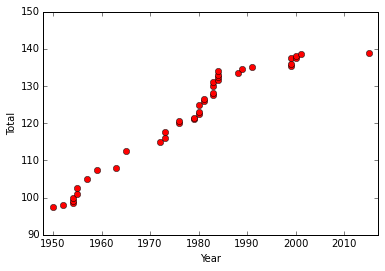

In [21]:
plt.plot(class56['Year'], class56['Record'], 'ro')
plt.axis([1948, 2017, 90, 150])
plt.xlabel('Year')
plt.ylabel('Total')
plt.savefig('YvsT.png')
plt.savefig('YvsT.pdf')
plt.show()

In [17]:
#saving records so that I don't have to scrape again
class Company(object):
    def __init__(self, worldrec):
        self.worldrec = worldrec

with open('worldrecords_data.pkl', 'wb') as output:
    wrdata = Company(records)
    pickle.dump(wrdata, output, pickle.HIGHEST_PROTOCOL)

#opens the file to make sure it worked    
with open('worldrecords_data.pkl', 'rb') as input:
    wrdatar = pickle.load(input)    

wrdata_load = wrdatar.worldrec    

In [7]:
#openning the file after closing the notebook 
import pickle
class Company(object):
    def __init__(self, worldrec):
        self.worldrec = worldrec
        
with open('worldrecords_data.pkl', 'rb') as input:
    wrdatar = pickle.load(input)    

records = wrdatar.worldrec  

In [435]:
records[records['Event'] == 'Total'].sort('Record', ascending=True).head()

,Event,Year,Country,Lifter,Weight Class,Record,Event Code
1097,Total,1973,Russia,Vladimir SMETANIN,52,232.5,3
1098,Total,1973,Iran,Mohammad NASSIRI,52,235.0,3
1099,Total,1973,Iran,Mohammad NASSIRI,52,240.0,3
1187,Total,1975,Russia,Alexander VORONIN,52,242.5,3
1272,Total,1977,Russia,Alexander VORONIN,52,245.0,3


In [174]:
P = records[(records['Event Code']==1) & (records['Weight Class']==56)].groupby('Year')['Record'].max()


In [296]:
X = []
for element in P.index:
    if element !=1984:
        X.append(element)

y =[]
for item in P:
    if item !=134:
        y.append(item)
        
print X, y        



[1950, 1952, 1954, 1955, 1957, 1959, 1963, 1965, 1972, 1973, 1976, 1979, 1980, 1981, 1983, 1988, 1989, 1991, 1999, 2000, 2001, 2015] [97.5, 98.0, 100.0, 102.5, 105.0, 107.5, 108.0, 112.5, 115.0, 117.5, 120.5, 121.5, 125.0, 126.5, 131.0, 133.5, 134.5, 135.0, 137.5, 138.0, 138.5, 139.0]


[ -5.38656952e+01   1.96044149e+03   1.98184894e-02   1.61837065e+02]


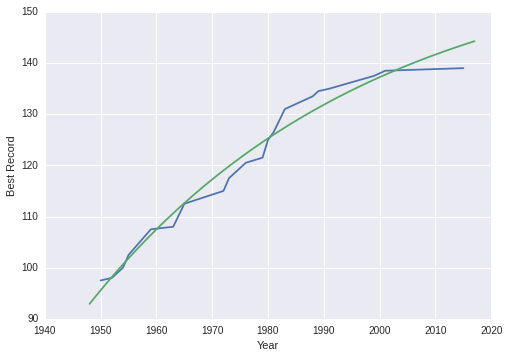

In [299]:
from pylab import *
from scipy.optimize import curve_fit

x = np.array(X)
y = np.array(y)

def func(x, a, b, c, d):
    return a*np.exp(-c*(x-b))+d

popt, pcov = curve_fit(func, x, y, [1948,2016,2,1900])
print(popt)

plot(x,y)
x=linspace(1948,2017,100)
plot(x,func(x,*popt))
plt.xlabel('Year')
plt.ylabel('Best Record')
plt.savefig('approxexp.png')
plt.savefig('approxexp.pdf')
show()

In [319]:
records[(records['Weight Class']==85) & (records['Event Code']==2)]

,Event,Year,Country,Lifter,Weight Class,Record,Event Code
1888,Clean and Jerk,1998,China,Yong ZHANG,85,218,2


In [3]:
LLS2 = []
url1 = 'http://www.iwf.net/results/ranking-list/?ranking_year='    
url2 = '&ranking_agegroup=Senior&ranking_gender=M&ranking_category='
url3 = '&ranking_lifter=all&x=13&y=10'
for i in range(1998,2016):
    for bw in ['56', '62', '69', '77', '85', '94', '105', '%2B105']:
        add = '%s%s%s%s%s' % (url1, i, url2, bw, url3)
        LLS2.append(add)

In [4]:
#Scraping the IWF website for results since 1998 *as far as their data goes*
recent = []
for i in range(len(LLS2)):
    recententries = []
    r= requests.get(LLS2[i])
    soup = BeautifulSoup(r.content)
    rows = soup.find_all("tr")
    for row in rows:
        cells = row.find_all('td')
        texcell = []
        for td in cells:    
            texcell.append(td.text)
        recententries.append(texcell)
    recent.append(recententries) 

In [5]:
#cleaning up the results from the previous scraping
r_attempts = []
for i in range(len(recent)):
    for j in range(1,len(recent[i])):
        if len(recent[i][j])==9:
            name = recent[i][j][1]
            birth = recent[i][j][2]
            country = recent[i][j][3]
            bweight = recent[i][j][4] 
            snatch = recent[i][j][5]
            
            try:    
                snatch = float(snatch)
            except:
                snatch = 0
                
            clean = recent[i][j][6]
            try:    
                clean = float(clean)
            except:
                clean = 0
                
            total = recent[i][j][7]
            try:    
                total = float(total)
            except:
                total = 0
                
            try:    
                placeyear = recent[i][j][8].split('.')
                year = float(placeyear[1])
            except:
                year = 0
            try:     
                birth = float(birth.split('.')[2])
            except:    
                birth = 0
                
            info = (year, country, name, birth, float(bweight), snatch, clean, total)
            r_attempts.append(info)           

In [6]:
r_attempts[0]

(1998.0, u'BUL', u'IVANOV Ivan', 1971.0, 55.86, 122.5, 160.0, 282.5)

In [7]:
len(r_attempts)

14156

In [9]:
#Passing the information onto Pandas to facilitate the analysis.
recents = pd.DataFrame(r_attempts, columns=['Year', 'Country','Lifter', 'Birth', 'Weight', 'Snatch', 'Clean and Jerk', 'Total'])

In [10]:
recents.head()

,Year,Country,Lifter,Birth,Weight,Snatch,Clean and Jerk,Total
0,1998,BUL,IVANOV Ivan,1971,55.86,122.5,160.0,282.5
1,1998,CUB,VARGAS William Trujillo,1970,55.94,127.5,155.0,282.5
2,1998,ROU,JIGAU Adrian Ioan,1970,55.79,117.5,145.0,262.5
3,1998,CUB,ALVAREZ BOULET Sergio,1979,55.75,115.0,142.5,257.5
4,1998,FRA,BONNEL Eric,1974,55.50,110.0,142.5,252.5


In [13]:
#looking at the data of the 56 from the IWF
recents[recents['Weight']<=56][['Year', 'Country', 'Lifter', 'Birth', 'Weight', 'Total']].sort(['Total','Year'], ascending=False).head()

,Year,Country,Lifter,Birth,Weight,Total
888,2000,TUR,MUTLU Halil,1973,55.62,305.0
393,1999,TUR,MUTLU Halil,1973,55.83,302.5
12839,2015,PRK,OM Yun Chol,1991,55.78,302.0
12840,2015,CHN,WU Jingbiao,1989,55.93,302.0
1234,2001,TUR,MUTLU Halil,1973,55.96,300.0


In [14]:
#saving recents so that I don't have to scrape again
class Company(object):
    def __init__(self, rec):
        self.rec = rec

with open('recent_data.pkl', 'wb') as output:
    recent_data = Company(recents)
    pickle.dump(recent_data, output, pickle.HIGHEST_PROTOCOL)

#opens the file to make sure it worked    
with open('recent_data.pkl', 'rb') as input:
    rdatar = pickle.load(input)    

recent_data_load = rdatar.rec 

In [2]:
#openning the file after closing the notebook 
import pickle
class Company(object):
    def __init__(self, rec):
        self.rec = rec
        
with open('recent_data.pkl', 'rb') as input:
    rdatar = pickle.load(input)    

recent_data_load = rdatar.rec  

In [3]:
recent_data_load.head()

,Year,Country,Lifter,Birth,Weight,Snatch,Clean and Jerk,Total
0,1998,BUL,IVANOV Ivan,1971,55.86,122.5,160.0,282.5
1,1998,CUB,VARGAS William Trujillo,1970,55.94,127.5,155.0,282.5
2,1998,ROU,JIGAU Adrian Ioan,1970,55.79,117.5,145.0,262.5
3,1998,CUB,ALVAREZ BOULET Sergio,1979,55.75,115.0,142.5,257.5
4,1998,FRA,BONNEL Eric,1974,55.50,110.0,142.5,252.5


In [15]:
#looking at people on the 56 with at least a 210 total
recent56 = recents[(recents['Weight']<=56) & (recents['Weight'] >52) & (recents['Total']>210)][['Year', 'Country', 'Lifter', 'Birth', 'Weight', 'Total']]

In [16]:
#of those people choose their best total.
liftermax = pd.DataFrame(recent56.groupby('Lifter')['Total'].max(), columns= ['Total'])

In [17]:
liftermax.head()

,Total
Lifter,
ABD EL Maksoud Ahmed,227.5
ABDALLAH Zaki,231.0
ABDELBAKI Mohamed Abdeltawwab I.,227.5
ABDULGASHUMOV Asali,224.0
ABDULHAMEED Marwan Saeed,230.0


In [283]:
recents[recents['Weight']<=56].groupby('Year')['Total'].max()

Year
1998    295.0
1999    302.5
2000    305.0
2001    300.0
2002    287.5
2003    287.5
2004    295.0
2005    281.0
2006    286.0
2007    283.0
2008    292.0
2009    292.0
2010    292.0
2011    292.0
2012    293.0
2013    289.0
2014    298.0
2015    302.0
Name: Total, dtype: float64

In [435]:
data56 = recents[(recents['Weight']<=56)]

In [ ]:
data56.head()

In [545]:
WWW = recents[(recents['Year']>1997) & (recents['Total']> 200)& (recents['Weight']<=56) & (recents['Weight']>52) ]

In [546]:
X = WWW[['Year', 'Weight']]

y = WWW['Total']

In [597]:
WWW.sort('Total', ascending=True).head()

,Year,Country,Lifter,Weight Class,Snatch,Clean and Jerk,Total
12943,2015,ALG,TOUAIRI Faris,55.90,91,110,201
10098,2013,AZE,AHMADOV Esmin,55.62,85,116,201
7482,2011,TPE,TSAI Ming-Chun,54.95,90,111,201
6078,2010,GER,PICHLER Christoph,55.72,88,113,201
4760,2009,EGY,ATIF Moustafa,54.73,90,111,201
